# Check and See Data

### Convert netCDF4 to hdf5 files

In [3]:
#from net_to_panda import  Convert_all_from
#Convert_all_from()

### PLOTTING SOME DATAS

466 3619


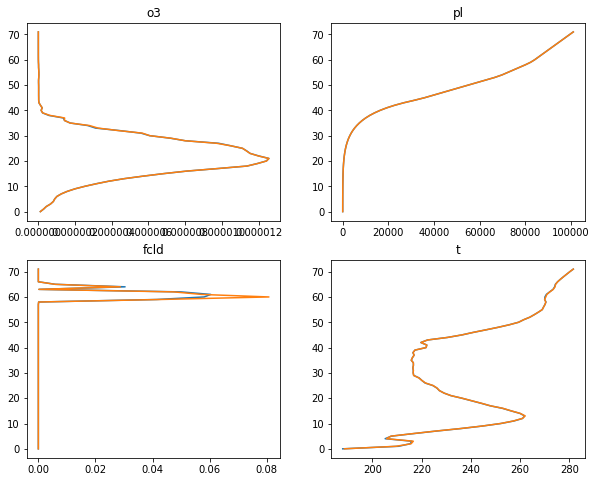

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure

idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx, idy)

fig = plt.figure( figsize=(10, 8))
ax1 = fig.add_subplot(221)
plt.plot(x["o3"][0,:,idy,idx], np.arange(72)); plt.title("o3")
plt.plot(x["o3"][0,:,idy-1,idx], np.arange(72)); plt.title("o3")
ax2 = fig.add_subplot(222)
plt.plot(x["pl"][0,:,idy,idx], np.arange(72)); plt.title("pl")
plt.plot(x["pl"][0,:,idy-1,idx], np.arange(72)); plt.title("pl")
ax3 = fig.add_subplot(223)
plt.plot(x["fcld"][0,:,idy,idx], np.arange(72)); plt.title("fcld")
plt.plot(x["fcld"][0,:,idy-1,idx], np.arange(72)); plt.title("fcld")
ax4 = fig.add_subplot(224)
plt.plot(x["t"][0,:,idy,idx], np.arange(72)); plt.title("t")
plt.plot(x["t"][0,:,idy-1,idx], np.arange(72)); plt.title("t")

plt.show()

43 2525


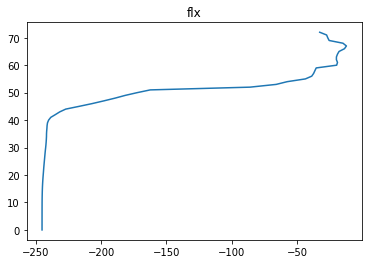

In [20]:
print(idx,idy)
#plt.plot(np.flip(y["flx"][0, 0:-1 ,idy,idx])-np.flip(y["flx"][0,1:,idy,idx]), np.arange(72)); plt.title("flx");
plt.plot(y["flx"][0,:,idy-1,idx], np.arange(73)); plt.title("flx");

In [23]:
np.max(y['flx'][:,-1])

55.072926

In [18]:
y["flx"][0,0,idy,idx]
y["flx"][0,1,idy,idx]

masked_array(data=-243.10362,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

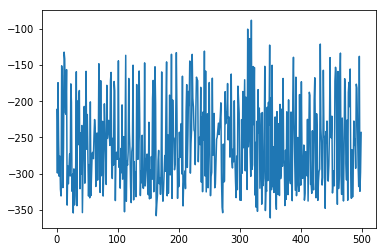

In [12]:
dif=[]

for i in range(500):
    idx = int(np.random.random()*n)
    idy = int(np.random.random()*p)
    dif.append(np.flip(y["flx"][0,0,idy,idx]))# - np.flip(y["flx"][0,1,idy,idx]))
plt.plot(dif);

In [13]:
np.min(y['flx'])

-385.70572

0.9907 0.9907
295.0831 295.0831


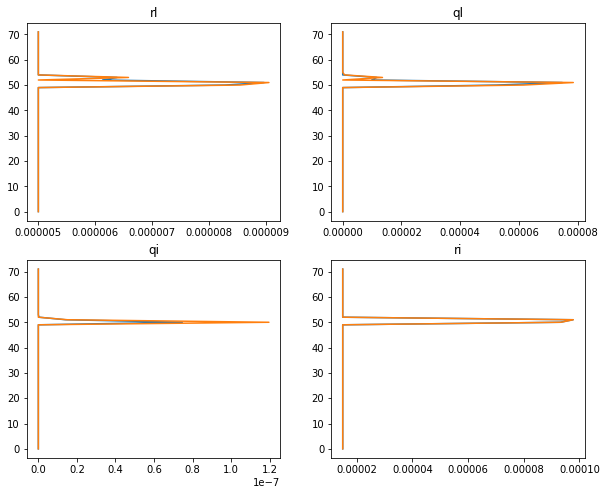

In [98]:
fig = plt.figure( figsize=(10, 8))
ax1 = fig.add_subplot(221)
plt.plot(x["rl"][0,:,idy,idx], np.arange(72)); plt.title("rl")
plt.plot(x["rl"][0,:,idy-1,idx], np.arange(72)); plt.title("rl")
ax2 = fig.add_subplot(222)
plt.plot(x["ql"][0,:,idy,idx], np.arange(72)); plt.title("ql")
plt.plot(x["ql"][0,:,idy-1,idx], np.arange(72)); plt.title("ql")
ax3 = fig.add_subplot(223)
plt.plot(x["qi"][0,:,idy,idx], np.arange(72)); plt.title("qi")
plt.plot(x["qi"][0,:,idy-1,idx], np.arange(72)); plt.title("qi")
ax4 = fig.add_subplot(224)
plt.plot(x["ri"][0,:,idy,idx], np.arange(72)); plt.title("ri")
plt.plot(x["ri"][0,:,idy-1,idx], np.arange(72)); plt.title("ri")
print(x["emis"][0,idy-1,idx], x["emis"][0,idy-1,idx])
print(x["ts"][0,idy-1,idx], x["ts"][0,idy-1,idx])

In [35]:
def PlotVar(v,x,idx,idy):
    plt.plot( np.flip(x[v][0,:,idy,idx]), np.arange(len(x[v][0,:,idy,idx])))
    plt.title(v)

174 154


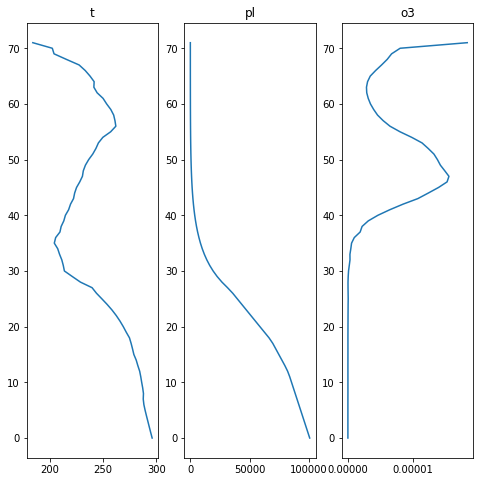

In [36]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx, idy)
fig = plt.figure( figsize=(8, 8))
ax1 = fig.add_subplot(131)
PlotVar('t', x, idx, idy)
ax2 = fig.add_subplot(132)
PlotVar('pl', x, idx, idy)
ax3 = fig.add_subplot(133)
PlotVar('o3', x, idx, idy)

In [123]:
pd.DataFrame(data=data[1:,1:],    # values
              index=data[1:,0],    # 1st column as index
              columns=data[0,1:])  # 1st row as the column names

86.98259

In [222]:
x['t']

<class 'netCDF4._netCDF4.Variable'>
float32 t(time, lev, Ydim, Xdim)
    long_name: air_temperature
    units: K
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: air_temperature
    vmin: -1000000000000000.0
    vmax: 1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    coordinates: lons lats
unlimited dimensions: time
current shape = (1, 72, 4320, 720)
filling on

### RL, RI analysis :

* They have a hard minimum, we should set it to 0
* They should be rescaled

In [123]:
print(np.min(x["ri"][:]),np.max(x["ri"][:]))
print(np.min(x["rl"][:]),np.max(x["rl"][:]))

1.5e-05 0.00010348039
5e-06 2.1e-05


428 1483


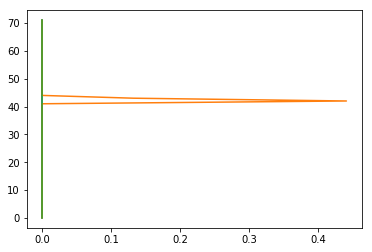

In [262]:
# RL, RI analysis

idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)
plt.plot(((x["ri"][0,:,idy,idx]-1.5e-05)/0.0001).T,np.arange(72))
plt.plot((x["fcld"][0,:,idy,idx]).T,np.arange(72))
plt.plot(((x["rl"][0,:,idy,idx]-5e-06)/2.1e-5).T,np.arange(72));

Data Prepross :
   * rl - min(rl) (i.e 1.5e-05)
   * ri - min(ri) (i.e 1.5e-06)

===================

700 1888


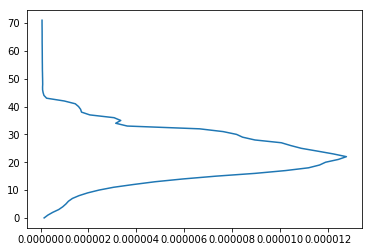

In [184]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)
plt.plot((x["o3"][0,:,idy,idx]).T,np.arange(72))
#plt.plot((x["pl"][0,:,idy,idx]).T,np.arange(72));

51 1674


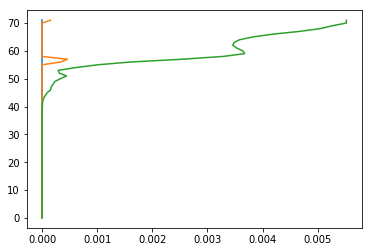

In [321]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)

#a=y['flx'][:].mean()
#b=y['flx'][:].std()

plt.plot(x["qi"][0,:,idy,idx].T,np.arange(72));
plt.plot(x["ql"][0,:,idy,idx].T,np.arange(72));
plt.plot(x["q"][0,:,idy,idx].T,np.arange(72));

In [7]:
d=dict()
d0 = y['flx'][:].std()
for k in x.keys():
    d[k] = x[k][:].std()

In [2]:
cov = []
v1=y['flx'][:].flatten()[-10000:]
for i,k in enumerate(x.keys()):
    if(len(x[k].shape)>3):
        print(k)
        v2=x[k][:].flatten()[-10000:]
        cov.append(np.corrcoef(v1,v2)[0,1])

fcld
o3
pl
q
qi


/home/victor/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/victor/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ql
ri
rl
t


In [6]:
v2=x['qi'][:].flatten()[-10000:]
print(np.max(v2), np.min(v2))

0.0 0.0


In [41]:
f=plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

def plotvar(x, var, id=0):
    if(len(x[var].shape)<4):
        t = x[var][0].T 
    else:
        t = x[var][0,id].T 
    y0 = np.arange(n)
    x0 = np.arange(p)

    nrows, ncols = n, p
    grid = t#temp.reshape((nrows, ncols))

    plt.imshow(grid, extent=(x0.min(), x0.max(), y0.max(), y0.min()),
               interpolation='nearest', cmap=cm.gist_rainbow)

<Figure size 640x480 with 0 Axes>

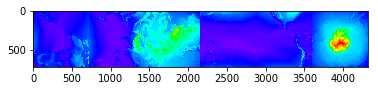

In [42]:
plotvar(x, 'ts');

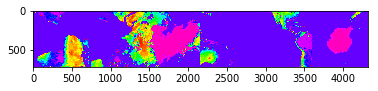

In [39]:
plotvar(x, 'emis');

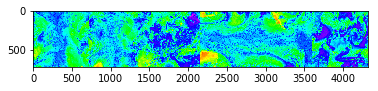

In [44]:
plotvar(y, 'flx', -1);

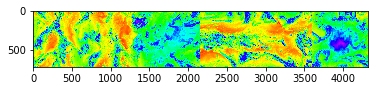

In [45]:
plotvar(y, 'flx', 0);

In [316]:
for k in x.keys():
    print( "{} : {}".format(k ,x[k].long_name))

Xdim : Fake Longitude for GrADS Compatibility
Ydim : Fake Latitude for GrADS Compatibility
lons : longitude
lats : latitude
lev : vertical level
time : time
emis : surface_emissivity
fcld : cloud_fraction_for_radiation
o3 : ozone_mass_mixing_ratio
pl : mid_level_pressure
q : specific_humidity
qi : in_cloud_cloud_ice_for_radiation
ql : in_cloud_cloud_liquid_for_radiation
ri : ice_phase_cloud_particle_effective_radius
rl : liquid_cloud_particle_effective_radius
t : air_temperature
ts : surface_skin_temperature
